#  ANALYZE AN ELECTRIC VEHICLE SALES IN INDIA

# STEP 1:- DATA COLLECTION
# Our first step is to load dataset in jupyter workbook. In the given example our data set is in the csv form

# Import necessary libaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
vehicle=pd.read_csv(r"C:\Users\rohan\Downloads\Electric Vehicle Sales by State in India.csv")

In [10]:
vehicle.shape
# it contains 96845 rows and 8 columns

(96845, 8)

In [11]:
vehicle.columns

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

In [12]:
# DISPLAY THE FIRST FIVE ROW OF THE DATA
vehicle.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [13]:
# DISPLAY THE LAST FIVE ROW OF THE DATA
vehicle.tail()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0
96844,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0.0


# STEP 2:- CHECKING FOR MISSING VALUES
# NOW WE HAVE TO CHECK FOR MISSING VALUES IN DATA SUCH AS NULL VALUES, DUPLICATES,INCORRECT DATA TYPE FORMAT etc.

In [14]:
# CHECKING FOR NULL VALUES IN A DATASET
vehicle.isnull().sum()
# It shows that there is no any null value present in any column

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [16]:
# CHECKING FOR DUPLICATED VALUE IN OUR DATASET
vehicle.duplicated().sum()
# It shows that there is no any duplicates value in our dataset.

0

In [20]:
# CHECKED THE DATA  TYPE OF EVERY COLUMN
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


# The column year is given in float we should have to convert it into int data type

In [21]:
vehicle["Year"]=vehicle["Year"].astype(int)

# The date column is in float we have to convert it into datetime data type

In [22]:
vehicle['Date'] = pd.to_datetime(vehicle['Date'], errors='coerce')

In [23]:
vehicle.info()
# Now everything is ok.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int32         
 1   Month_Name         96845 non-null  object        
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  object        
 4   Vehicle_Class      96845 non-null  object        
 5   Vehicle_Category   96845 non-null  object        
 6   Vehicle_Type       96845 non-null  object        
 7   EV_Sales_Quantity  96845 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(5)
memory usage: 5.5+ MB


# STEP 3:- QUICK OVERVIEW OF DATA

In [17]:
vehicle.Year.value_counts() 
# So the data contains information from 2014 to 2024

Year
2019.0    10315
2023.0    10279
2018.0    10225
2022.0    10021
2017.0     9799
2016.0     9348
2021.0     9249
2015.0     9052
2014.0     9022
2020.0     8675
2024.0      860
Name: count, dtype: int64

In [18]:
vehicle.State.value_counts()
# It shows that the given data contains all the state and union territory

State
Maharashtra                 4912
Karnataka                   4830
Uttar Pradesh               4557
Rajasthan                   4552
Gujarat                     4517
West Bengal                 4196
Tamil Nadu                  4063
Odisha                      4027
Haryana                     3842
Kerala                      3666
Chhattisgarh                3590
Madhya Pradesh              3587
Andhra Pradesh              3457
Assam                       3114
Uttarakhand                 3045
Himachal Pradesh            2980
Punjab                      2950
Jharkhand                   2773
Bihar                       2544
Jammu and Kashmir           2292
Arunachal Pradesh           2285
Goa                         2139
DNH and DD                  1927
Delhi                       1871
Meghalaya                   1867
Puducherry                  1832
Manipur                     1632
Nagaland                    1588
Tripura                     1564
Mizoram                     1557
Chan

In [19]:
vehicle.Vehicle_Type.value_counts()
# Below are the type of vehicles being sold in the market

Vehicle_Type
Others                54423
2W_Personal           11700
Bus                    7026
4W_Shared              4580
4W_Personal            4111
3W_Shared              3786
3W_Goods               3208
Institution Bus        2093
3W_Shared_LowSpeed     1951
3W_Goods_LowSpeed      1517
2W_Shared              1421
3W_Personal            1029
Name: count, dtype: int64

In [24]:
vehicle.describe()

,Year,Date,EV_Sales_Quantity
count,96845.000000,96845,96845.000000
mean,2018.622768,2019-01-28 11:00:33.641385728,37.108896
min,2014.000000,2014-01-01 00:00:00,0.000000
25%,2016.000000,2016-08-01 00:00:00,0.000000
50%,2019.000000,2019-02-01 00:00:00,0.000000
75%,2021.000000,2021-09-01 00:00:00,0.000000
max,2024.000000,2024-01-01 00:00:00,20584.000000
std,2.895581,NaN,431.566675


In [ ]:
# STEP 4:- DATA VISUALIZATION
# NOW WE CAN VISUALIZE DATA TO FIND THE KEY INSIGHTS.

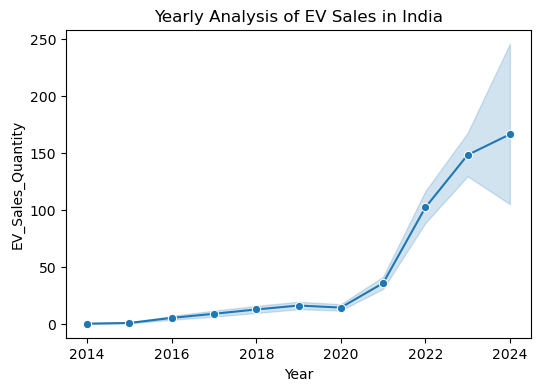

In [31]:
plt.figure(figsize=(6,4))
sns.lineplot(x="Year",y="EV_Sales_Quantity",data=vehicle,marker="o")
plt.title("Yearly Analysis of EV Sales in India")
plt.show()

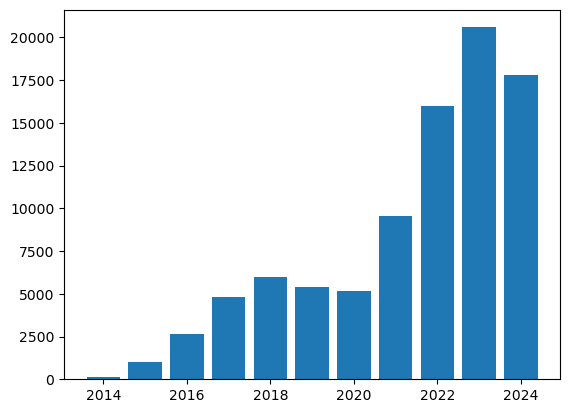

In [79]:
plt.bar(vehicle["Year"],vehicle["EV_Sales_Quantity"])
plt.show()

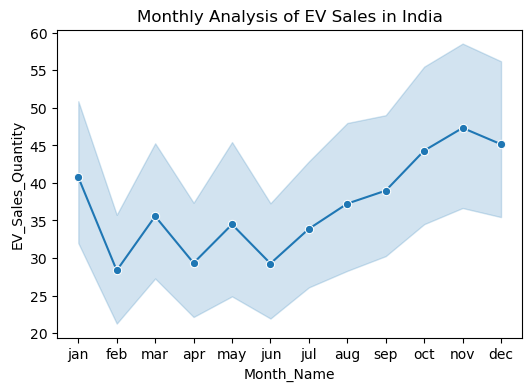

In [46]:
plt.figure(figsize=(6,4))
sns.lineplot(x="Month_Name",y="EV_Sales_Quantity",data=vehicle,marker="o")
plt.title("Monthly Analysis of EV Sales in India")
plt.show()

In [55]:
v=vehicle.groupby("State")["EV_Sales_Quantity"].sum().sort_values(ascending=False).iloc[:6]
states=v.index
values=v.values
print(values)
#print(v)

[732074. 401535. 315498. 268538. 228573. 213465.]


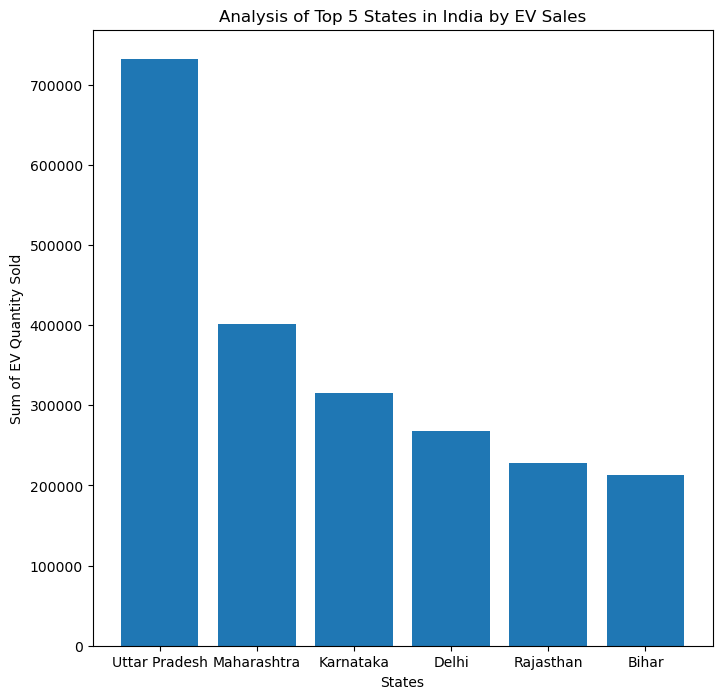

In [59]:
plt.figure(figsize=(8,8))
plt.bar(states,values)
plt.xlabel("States")
plt.ylabel("Sum of EV Quantity Sold")
plt.title("Analysis of Top 5 States in India by EV Sales")
plt.show()

In [61]:
category=vehicle.groupby("Vehicle_Category")["EV_Sales_Quantity"].count()
print(category)

Vehicle_Category
2-Wheelers    13121
3-Wheelers    11491
4-Wheelers     8691
Bus            9119
Others        54423
Name: EV_Sales_Quantity, dtype: int64


In [64]:
label=category.index
datas=category.values
print(datas)

[13121 11491  8691  9119 54423]


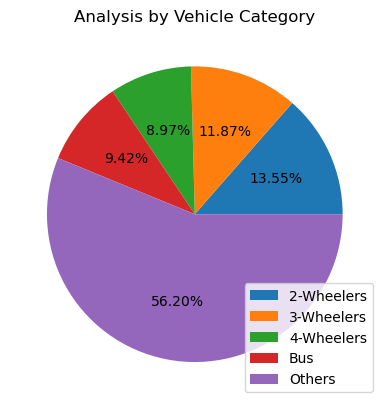

In [69]:
plt.pie(datas,autopct="%0.2f%%")
plt.legend(label)
plt.title("Analysis by Vehicle Category")
plt.show()

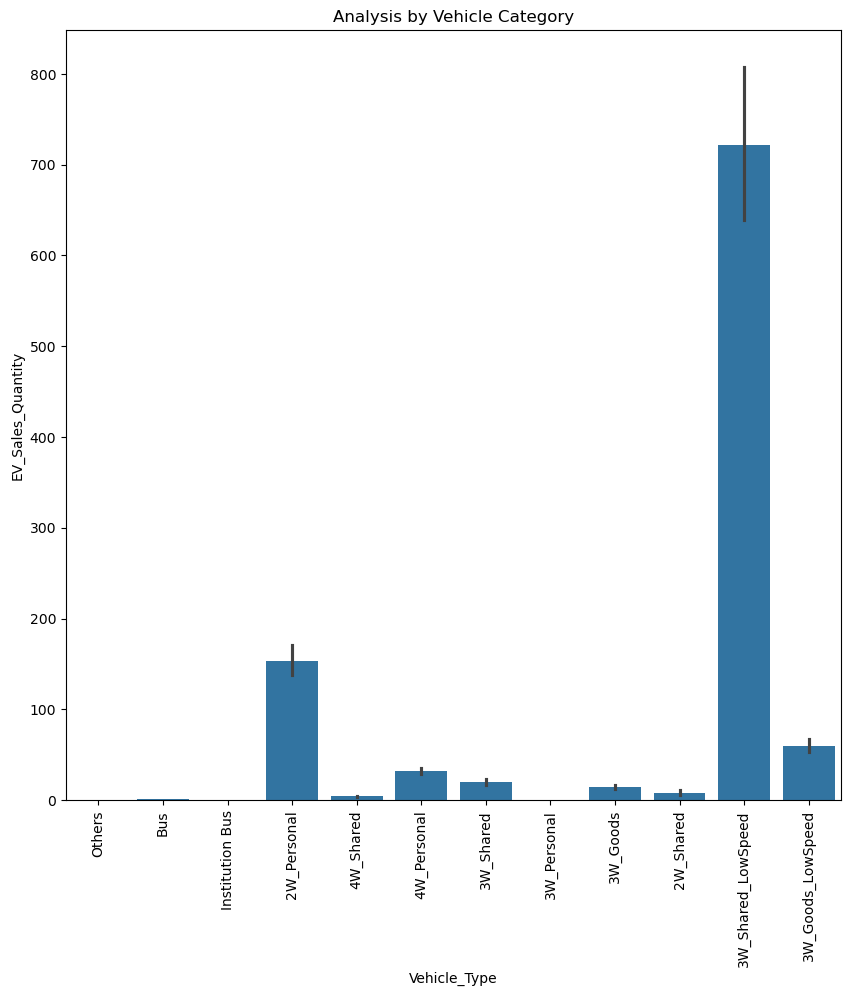

In [84]:
plt.figure(figsize=(10,10))
sns.barplot(x="Vehicle_Type",y="EV_Sales_Quantity",data=vehicle)
plt.title("Analysis by Vehicle Category")
plt.xticks(rotation=90)
plt.show()